In [ ]:
# 程序中使用到的自定义工具函数
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib
import pandas as pd

def read_data(path: str):
    data = pd.read_excel(path, header=1) # 原始数据，包含表头
    s = data[0] # 硫含量
    RON = data[1] # 辛烷值
    # factors = data.drop(columns={0, 1, 2}) # 其它因素
    factors = factors.dropna(axis=1) # 去除空值列
    return s, RON, factors

# 获得选取的主要变量的数据
def use_data(data, column_set: list):
    return pd.DataFrame(data, columns=column_set)

# 训练神经网络模型
def train_mlp(X_train, y_train, num=300):
    # 数据标准化
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    # 定义神经网络
    clf = MLPRegressor(hidden_layer_sizes=(num,), random_state=0, max_iter=10000,
    shuffle=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    print(mse)
    print(clf.score(X_train, y_train))
    return clf, scaler
def train_rf(X_train, y_train):
    # 定义随机森林
    clf = RandomForestRegressor(n_estimators=500,
    random_state=0,
    max_features="auto",
    n_jobs=2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    print(mse)
    print(clf.score(X_train, y_train))
    return clf
# 保存模型
def save_model(clf, name, scaler=None):
    joblib.dump(clf, "./model_1/" + name + ".pkl")
    if scaler:
        joblib.dump(scaler, "./model_1/" + name + ".s")
# 加载模型
def load_model(name, scaler=None):
    model = joblib.load("./model_1/" + name + ".pkl")
    if scaler:
        s = joblib.load("./model_1/" + name + ".s")
    return model

# 保存粒子群算法优化的样本操作函数
def save_pso_data(pso, i:int):
    joblib.dump(pso, "optimization_data/" + "sample_" + str(i) + ".con")

# 2 距离相关系数计算

In [2]:
ls

 驱动器 D 中的卷是 Data
 卷的序列号是 4248-79E8

 D:\cf-projects\01-科研\2021研究生数学建模\02-working\MathModel2021\Problem1 的目录

2021/10/14  19:36    <DIR>          .
2021/10/14  19:36    <DIR>          ..
2021/10/14  19:36    <DIR>          .ipynb_checkpoints
2021/10/14  19:29             6,176 2021-10-14指标提取.ipynb
2021/10/14  19:33             1,709 T1_corrs.py
               2 个文件          7,885 字节
               3 个目录 162,705,108,992 可用字节


In [3]:
pwd

'D:\\cf-projects\\01-科研\\2021研究生数学建模\\02-working\\MathModel2021\\Problem1'

In [6]:
# test
path = r'D:\cf-projects\01-科研\2021研究生数学建模\02-working\MathModel2021\Problem1\Molecular_Descriptor.xlsx'
raw_data = pd.read_excel(path) # 原始数据，包含表头
# data = raw_data.values # 去除表头的数据



<ipython-input-6-500435644613>:3: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  raw_data = pd.read_excel(path) # 原始数据，包含表头


# 相关性分析，坐标矩阵

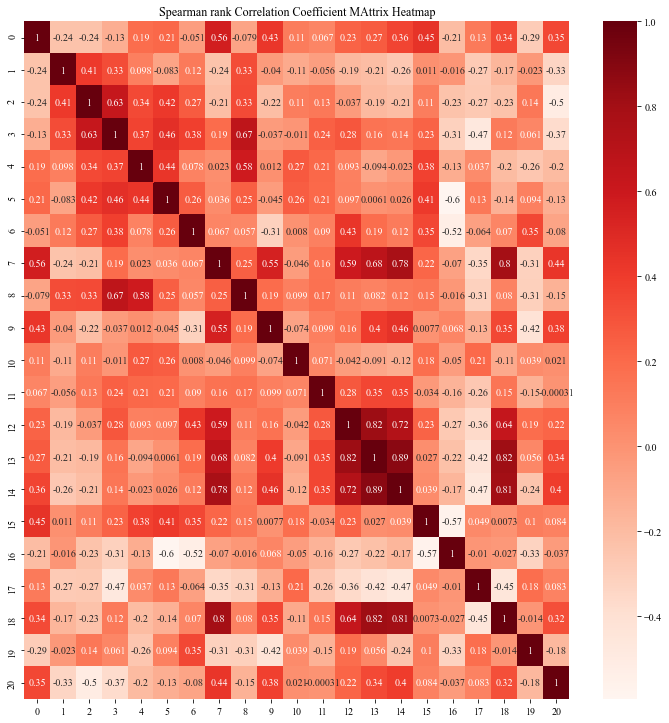

In [96]:
# 相关性分析

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ads = pd.read_excel('./关联度data.xlsx',header=None)
df_ads.head()

df_ads
# df_t = df_ads.iloc[1:,[0,1,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19]]
df_t = df_ads.iloc[1:,:]
df_t
# df_t.corr()

df_1 = df_t.apply(lambda x:x.astype(float))

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.figure(figsize=(10, 10))
plt.rcParams['font.sans-serif'] = ['Times New Roman']
# sns.heatmap(df_ads.corr(), cmap="Reds", annot = True,annot_kws={"size":8})
sns.heatmap(df_1.corr(method='spearman'), cmap="Reds", annot = True)
plt.tight_layout()
plt.title("Spearman rank Correlation Coefficient MAttrix Heatmap")
plt.savefig("./随机森林+灰度预测-热力图.png",dpi=600)
plt.show()


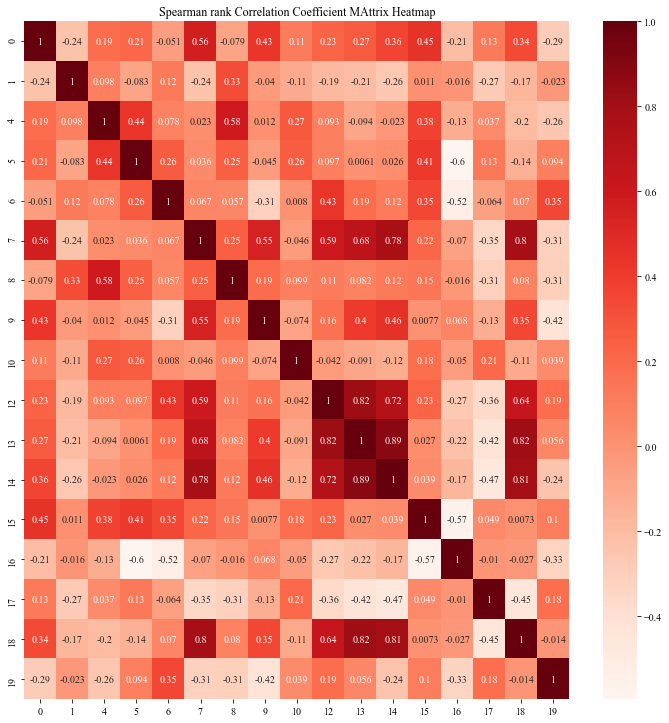

In [85]:
# df_t = df_ads.iloc[1:,[0,1,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19]]
df_t = df_ads.iloc[1:,:]
df_t
# df_t.corr()


plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.figure(figsize=(10, 10))
plt.rcParams['font.sans-serif'] = ['Times New Roman']
# sns.heatmap(df_ads.corr(), cmap="Reds", annot = True,annot_kws={"size":8})
sns.heatmap(df_1.corr(method='spearman'), cmap="Reds", annot = True)
plt.tight_layout()
plt.title("Spearman rank Correlation Coefficient MAttrix Heatmap")
plt.savefig("./随机森林+灰度预测-热力图.png",dpi=600)
plt.show()


In [70]:
df_t.corr()

""


# 随机森林+SPSS 斯皮尔曼分析

In [87]:
# 相关性分析

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ads = pd.read_excel('./Top50 相关性.xlsx',header=None)
df_ads




,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,NaN,pIC50,LipoaffinityIndex,MDEC-23,MLogP,maxssO,MLFER_A,BCUTc-1l,minsOH,nC,...,Kier3,McGowan_Volume,MDEC-13,MDEC-22,MLFER_BO,MLFER_S,MLFER_E,VABC,WTPT-2,WTPT-3
1,0.0,8.60206,11.830949,28.277932,3.77,6.593009,0.546,-0.360525,9.968948,26,...,5.742188,3.4104,0,26.172039,1.847,2.288,2.529,414.727478,2.089409,15.471445
2,1.0,8.124939,13.149974,31.076748,3.99,6.674642,0.546,-0.36053,10.058948,28,...,6.61157,3.6922,0,31.359828,1.847,2.288,2.529,449.319447,2.089698,15.486947
3,2.0,8.508638,10.577177,30.901064,3.77,6.502751,1.089,-0.361379,9.752886,27,...,6.415683,3.481,0,25.916013,2.186,2.901,3.133,422.004313,2.083301,18.011114
4,3.0,8.408935,13.212767,30.570001,3.99,6.622142,0.546,-0.36053,10.025028,28,...,6.816568,3.6922,0,30.776455,1.847,2.288,2.529,449.319447,2.087385,15.468365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,1973.0,7.568636,10.371184,44.466435,4.21,6.281369,1.089,-0.363905,9.793792,34,...,7.605251,4.2787,2.717886,23.343682,2.309,3.627,3.539,530.8016,2.062989,25.464529
1975,NaN,皮尔逊相关性,.492**,.538**,.529**,.225**,.358**,-.319**,.466**,.460**,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,NaN,Sig.（双\n尾）,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,NaN,序号,1,2,3,4,5,6,7,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df_t = df_ads.iloc[1:1974,1:22]
df_t

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
1,8.60206,11.830949,28.277932,3.77,6.593009,0.546,-0.360525,9.968948,26,6.050188,...,9.968948,1,9.968948,19.410374,3.092949,9.238227,0.62903,1,4,3.092949
2,8.124939,13.149974,31.076748,3.99,6.674642,0.546,-0.36053,10.058948,28,6.083246,...,10.058948,1,10.058948,19.530549,2.997752,9.238227,0.62121,1,4,2.997752
3,8.508638,10.577177,30.901064,3.77,6.502751,1.089,-0.361379,9.752886,27,6.020424,...,9.977508,1,19.730394,27.14632,3.125957,10.328977,0.62879,2,5,3.125957
4,8.408935,13.212767,30.570001,3.99,6.622142,0.546,-0.36053,10.025028,28,6.071897,...,10.025028,1,10.025028,19.452294,3.022916,8.52991,0.62121,1,4,3.022916
5,8.130768,12.489691,30.570001,3.99,6.55281,0.546,-0.36053,9.993342,28,6.046045,...,9.993342,1,9.993342,30.949906,3.103616,8.52991,0.62121,1,4,3.103616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,6.826814,10.21418,41.373662,4.21,6.266249,1.089,-0.363872,9.764259,32,5.736804,...,9.813474,3,19.577733,40.387871,0,14.658998,0.61538,2,6,0
1970,6.131944,10.292932,45.421854,4.21,6.299676,1.089,-0.363905,9.808143,34,5.340113,...,9.862971,3,19.671114,36.46625,0,17.109186,0.62791,2,8,0
1971,5.850781,7.884092,45.421854,3.99,6.260832,2.175,-0.364009,9.696786,32,5.760169,...,9.82912,3,39.000194,32.410085,0,17.109186,0.62195,4,8,0
1972,7.721246,7.965074,44.466435,3.99,6.247428,2.175,-0.364009,9.645181,32,5.702148,...,9.81532,3,38.871608,32.695525,0,16.351392,0.62195,4,8,0


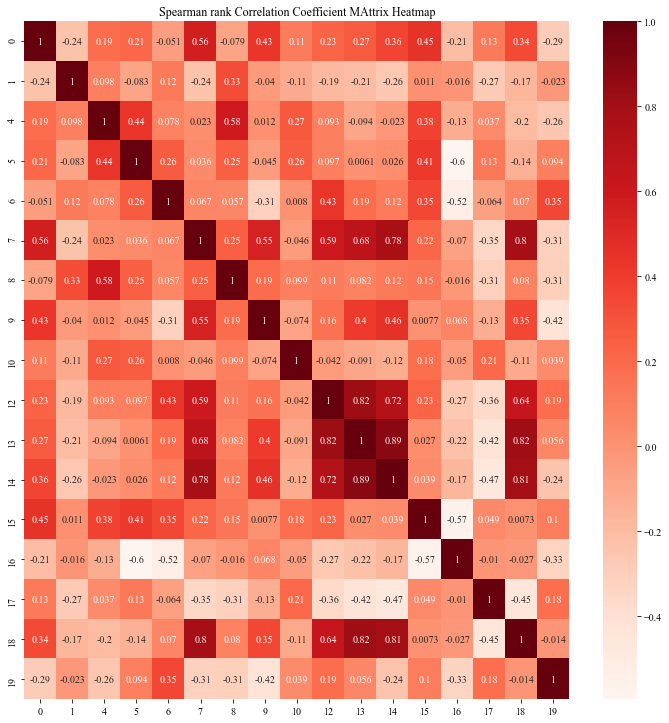

In [91]:
# df_ads
# # df_t = df_ads.iloc[1:,[0,1,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19]]
# df_t = df_ads.iloc[1:,:]
# df_t
# df_t.corr()


plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.figure(figsize=(10, 10))
plt.rcParams['font.sans-serif'] = ['Times New Roman']
# sns.heatmap(df_ads.corr(), cmap="Reds", annot = True,annot_kws={"size":8})
sns.heatmap(df_1.corr(method='spearman'), cmap="Reds", annot = True)
plt.tight_layout()
plt.title("Spearman rank Correlation Coefficient MAttrix Heatmap")
plt.savefig("./随机森林+SPSS-热力图.png",dpi=600)
plt.show()

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.rcParams['font.sans-serif'] = ['Times New Roman']
sns.heatmap(df_t.corr(), cmap="Reds", annot = True,annot_kws={"size":8})
# sns.heatmap(df_t.corr(), cmap="Reds")
plt.tight_layout()
plt.title("Spearman rank Correlation Coefficient MAttrix Heatmap")
plt.savefig("./热力图.png",dpi=600)

plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 576x576 with 0 Axes>

In [5]:
# 变量之间的距离相关系数计算
# 相关性分析
from scipy.spatial.distance import pdist, squareform
import numpy as np
import pandas as pd

def distcorr(X, Y):
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum() / float(n * n)
    dcov2_xx = (A * A).sum() / float(n * n)
    dcov2_yy = (B * B).sum() / float(n * n)
    dcor = np.sqrt(dcov2_xy) / np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    
    return dcor

path = r'D:\cf-projects\01-科研\2021研究生数学建模\02-working\MathModel2021\Molecular_Descriptor.xlsx'
raw_data = pd.read_excel(path) # 原始数据，包含表头
data = raw_data.values # 去除表头的数据

# s = data[:, 0] # 硫含量
# RON = data[:, 1] # 辛烷值
factors = data[:, 2:] # 其它因素

m, n = factors.shape
corrs = np.zeros((n, n))
for i in range(n):
    print(i)
    for j in range(i, n):
        corrs[i, j] = distcorr(factors[:, i], factors[:, j])

print(corrs)
frame = pd.DataFrame(corrs)
frame.to_excel(r'D:\cf-projects\01-科研\2021研究生数学建模\02-working\MathModel2021\corr.xlsx', "Sheet2")

<ipython-input-5-1e8239ade644>:32: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  raw_data = pd.read_excel(path) # 原始数据，包含表头


0


<ipython-input-5-1e8239ade644>:27: RuntimeWarning: invalid value encountered in double_scalars
  dcor = np.sqrt(dcov2_xy) / np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))


1


KeyboardInterrupt: 